In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Données des villes

In [3]:
cities = pd.read_csv('cities.csv')
cities 

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [4]:
# les valeurs manquantes dans les données
cities.isna().sum()

id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

on remarque que presque 95% de la variable population est manquant.

In [5]:
cities.id.unique().shape[0]

8040

In [6]:
cities.unique_name.unique().shape[0]

8040

Tous les villes dans les données sont uniques (pas de valeurs dupliquées)

In [7]:
cities.loc[:,['latitude', 'longitude']].describe()

,latitude,longitude
count,8040.000000,8040.000000
mean,47.223456,6.299331
std,3.700934,7.747070
min,1.370676,-101.397388
25%,44.662402,1.214282
50%,47.304750,4.887856
75%,49.611998,10.311597
max,64.145981,48.731938


# Données des stations

In [8]:
stations = pd.read_csv('stations.csv')
stations 

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [9]:
# les valeurs manquantes dans les données
stations.isna().sum()

id             0
unique_name    0
latitude       0
longitude      0
dtype: int64

In [10]:
stations.unique_name.unique().shape[0]

11035

In [11]:
stations.loc[:,['latitude', 'longitude']].describe()

,latitude,longitude
count,11035.000000,11035.000000
mean,47.526678,7.580807
std,3.953972,63.655681
min,-22.355790,-22.625538
25%,44.896447,1.358655
50%,47.759670,5.824010
75%,50.349956,12.166133
max,64.137571,6645.000000


# Données des providers 

In [12]:
providers = pd.read_csv('providers.csv')
providers

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [13]:
# les valeurs manquantes dans les données
providers.isna().sum()

id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

In [14]:
providers.company_id.unique().shape[0]

14

In [15]:
providers.loc[:,[ 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']].describe()

,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
count,224,224,224,224,227
unique,2,2,2,2,4
top,False,False,False,False,bus
freq,220,221,212,223,214


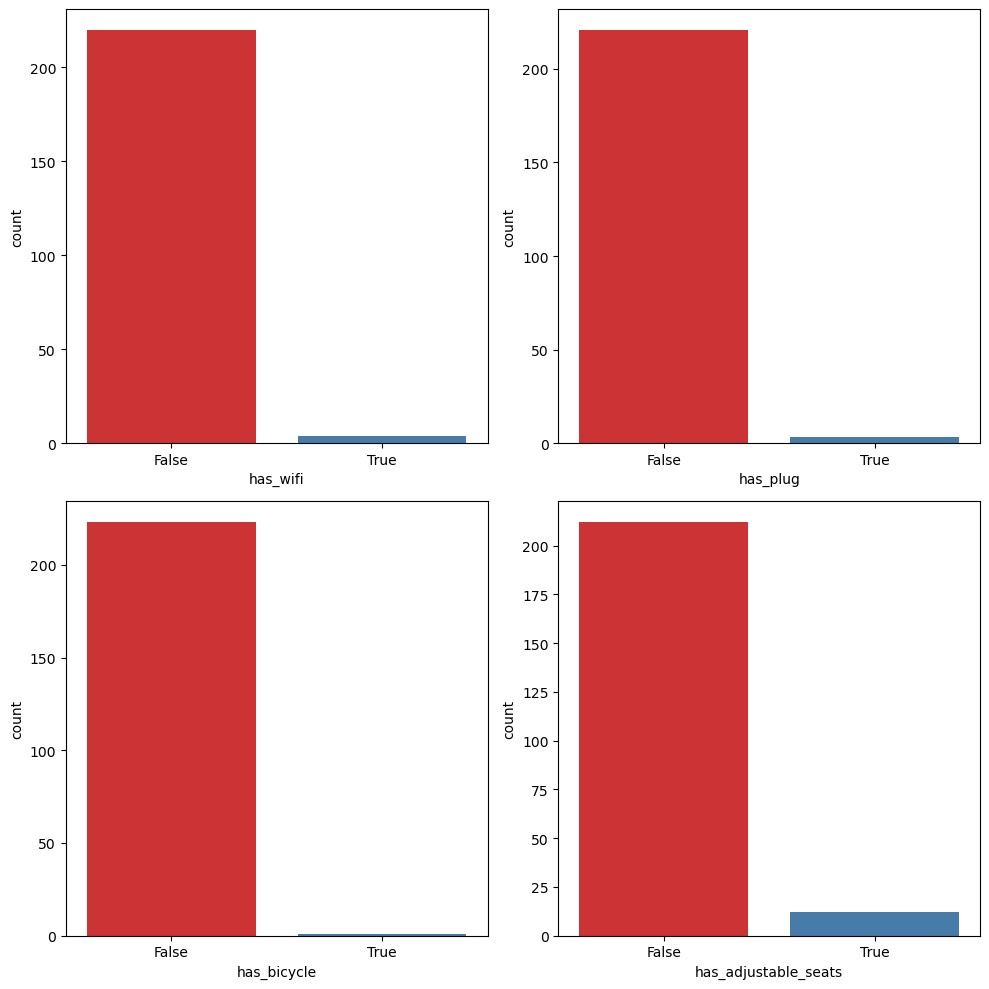

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# has_wifi
sns.countplot(x='has_wifi', data=providers, palette='Set1', ax=axs[0, 0])

# has_plug
sns.countplot(x='has_plug', data=providers, palette='Set1', ax=axs[0, 1])

# has_bicycle
sns.countplot(x='has_bicycle', data=providers, palette='Set1', ax=axs[1, 0])

# has_adjustable_seats
sns.countplot(x='has_adjustable_seats', data=providers, palette='Set1', ax=axs[1, 1])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='transport_type', ylabel='count'>

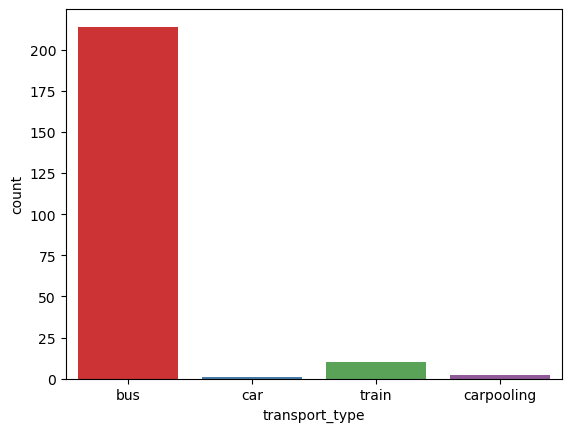

In [17]:
sns.countplot(x='transport_type', data=providers, palette='Set1')

# Données des tickets

In [22]:
tickets = pd.read_csv('ticket_data.csv')

In [27]:
# changer le types des variables qual.
tickets.o_station = tickets.o_station.astype("category")
tickets.d_station = tickets.d_station.astype("category")

tickets['departure_ts'] = pd.to_datetime(tickets['departure_ts'])
tickets['arrival_ts'] = pd.to_datetime(tickets['arrival_ts'])
tickets['search_ts'] = pd.to_datetime(tickets['search_ts'])

tickets.dtypes

id                               int64
company                          int64
o_station                     category
d_station                     category
departure_ts       datetime64[ns, UTC]
arrival_ts         datetime64[ns, UTC]
price_in_cents                   int64
search_ts          datetime64[ns, UTC]
middle_stations                 object
other_companies                 object
o_city                           int64
d_city                           int64
distance_cities                float64
dtype: object

In [29]:
# Calculer une variable qui représentera la durée du trajet
tickets['duration'] = (tickets['arrival_ts'] - tickets['departure_ts'])/ pd.Timedelta(1, unit='h')

# Calculer une variable qui représentera la durée entre le départ et la recherche du ticket
tickets['duration_search'] = (tickets['departure_ts'] - tickets['search_ts'])/ pd.Timedelta(1, unit='h')


tickets.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance_cities,duration,duration_search
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,NaN,611,542,503.197862,6.166667,301.774631
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",{13},611,542,503.197862,17.833333,300.856730
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,503.197862,31.950000,301.222163
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}","{8377,8376}",611,542,503.197862,21.583333,301.222163
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",{8380},611,542,503.197862,21.766667,309.538830


In [36]:
tickets.dropna(inplace=True)
tickets = tickets.reset_index(drop=True)

In [35]:
import ast
# changer les deux variables en colonnes de listes
tickets["middle_stations"] = tickets["middle_stations"].apply(lambda x: ast.literal_eval(x.strip()))
tickets["other_companies"] = tickets["other_companies"].apply(lambda x: ast.literal_eval(x.strip()))

# Extraire nombre de middle stations et other companies
tickets['n_other_companies'] = [len(l) for l in tickets['other_companies']] 
tickets['n_middle_stations'] = [len(l) for l in tickets['middle_stations']] 

tickets.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance_cities,duration,duration_search,n_other_companies,n_middle_stations
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{418, 149}",{13},611,542,503.197862,17.833333,300.856730,1,2
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,503.197862,31.950000,301.222163,2,3
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,503.197862,21.583333,301.222163,2,3
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,{5983},{8380},611,542,503.197862,21.766667,309.538830,1,1
49,6795074,13,767.0,396.0,2017-10-06 05:25:00+00:00,2017-10-06 16:40:00+00:00,1990,2017-10-01 01:04:12.450000+00:00,{932},{13},628,453,205.842875,11.250000,124.346542,1,1


# Combinner les tables

on peut calculer à partir des longitudes et latitudes les distances entre deux villes ou deux stations

In [38]:
import haversine
def calculate_distance_city(id1, id2):
    city1 = (cities.latitude[cities['id'] == id1].values[0], cities.longitude[cities['id'] == id1].values[0])
    city2 = (cities.latitude[cities['id'] == id2].values[0], cities.longitude[cities['id'] == id2].values[0])
    return haversine.haversine(city1, city2)


def calculate_distance_station(id1, id2):
    station1 = (stations.latitude[stations['id'] == id1].values[0], stations.longitude[stations['id'] == id1].values[0])
    station2 = (stations.latitude[stations['id'] == id2].values[0], stations.longitude[stations['id'] == id2].values[0])
    return haversine.haversine(station1, station2)


o_city = tickets['o_city']
d_city = tickets['d_city']
tickets['distance_cities'] = [calculate_distance_city(o_city[i],d_city[i]) for i in range(0,tickets.shape[0]) ]

o_station = tickets['o_station']
d_station = tickets['d_station']
tickets['distance_stations'] = [calculate_distance_station(o_station[i],d_station[i]) for i in range(0,tickets.shape[0]) ]
tickets.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance_cities,duration,duration_search,n_other_companies,n_middle_stations,distance_stations
0,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{418, 149}",{13},611,542,503.197862,17.833333,300.856730,1,2,504.166029
1,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,503.197862,31.950000,301.222163,2,3,504.319149
2,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{6246, 6794, 798}","{8376, 8377}",611,542,503.197862,21.583333,301.222163,2,3,504.319149
3,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,{5983},{8380},611,542,503.197862,21.766667,309.538830,1,1,504.319149
4,6795074,13,767.0,396.0,2017-10-06 05:25:00+00:00,2017-10-06 16:40:00+00:00,1990,2017-10-01 01:04:12.450000+00:00,{932},{13},628,453,205.842875,11.250000,124.346542,1,1,220.385253


# Analyse des variables 